In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix, recommenderlab, slam, data.table, rARPACK, recosystem)

In [2]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [3]:
#memory.limit(size=64000)

In [4]:
memory.limit()

[1] 50000

In [5]:
df <- fread("./Data/amazon/Reviews.csv", sep = ",", header= TRUE)

In [6]:
tail(df)

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,"My only complaint is that there's so much of it, I don't use a huge amount of 5 spice, so I gave 1 jar to my sister. Good enough."
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,"I'm disappointed with the flavor. The chocolate notes are especially weak. Milk thickens it but the flavor still disappoints. This was worth a try but I'll never buy again. I will use what's left, which will be gone in no time thanks to the small cans."
568452,B004I613EE,A121AA1GQV751Z,"pksd """"pk_007""""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 of those in one training session. I tried to train our dog with """"Ceaser dog treats"""", it just made our puppy hyper. If you compare the ingredients, you will know why. Little stars has just basic food ingredients without any preservatives and food coloring. Sweet potato flavor also did not make my hand smell like dog food."
568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch """"katwel""""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rewarding your dog for being good while grooming. Lower in calories and loved by all the doggies. Sweet potatoes seem to be their favorite Wet Noses treat!
568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner."


In [7]:
str(df)

Classes 'data.table' and 'data.frame':	568454 obs. of  10 variables:
 $ Id                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ProductId             : chr  "B001E4KFG0" "B00813GRG4" "B000LQOCH0" "B000UA0QIQ" ...
 $ UserId                : chr  "A3SGXH7AUHU8GW" "A1D87F6ZCVE5NK" "ABXLMWJIXXAIN" "A395BORC6FGVXV" ...
 $ ProfileName           : chr  "delmartian" "dll pa" "Natalia Corres \"\"Natalia Corres\"\"" "Karl" ...
 $ HelpfulnessNumerator  : int  1 0 1 3 0 0 0 0 1 0 ...
 $ HelpfulnessDenominator: int  1 0 1 3 0 0 0 0 1 0 ...
 $ Score                 : int  5 1 4 2 5 4 5 5 5 5 ...
 $ Time                  : int  1303862400 1346976000 1219017600 1307923200 1350777600 1342051200 1340150400 1336003200 1322006400 1351209600 ...
 $ Summary               : chr  "Good Quality Dog Food" "Not as Advertised" "\"\"Delight\"\" says it all" "Cough Medicine" ...
 $ Text                  : chr  "I have bought several of the Vitality canned dog food products and have found them all to be of good qua

In [8]:
reviews <- as.data.frame(df)

In [9]:
head(reviews,3)

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres """"Natalia Corres""""",1,1,4,1219017600,"""""Delight"""" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."


In [10]:
reviews$UserId <- str_replace_all(reviews$UserId, '#oc-', '' )

In [11]:
# remove duplicated UsedId and ProductId
reviews <- reviews[!duplicated(reviews[,c(2,3)]),]

In [12]:
# Select needed columns, ProductId, Id, UserId, ProfileName, Score, Summary, Text, count, mean_score
reviews2 <- reviews[,c(1:4, 7, 9:10)]

In [13]:
reviews2 <- reviews2 %>%
    mutate(combine_summary = paste(Summary, Text))

In [14]:
nrow(reviews2[duplicated(reviews2$combine_summary),])

[1] 167327

In [15]:
reviews2 <- reviews2[!duplicated(reviews2$combine_summary),]

In [16]:
head(reviews2, 2)

Id,ProductId,UserId,ProfileName,Score,Summary,Text,combine_summary
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo"""".","Not as Advertised Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo""""."


In [17]:
p_count <- reviews2 %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [18]:
head(p_count, 5)

ProductId,count
<chr>,<int>
B007JFMH8M,912
B003B3OOPA,623
B002QWP89S,609
B001EO5Q64,566
B000KV61FC,555


In [19]:
reviews2 <- merge(reviews2, p_count, by.x = 'ProductId', by.y = 'ProductId', all.x = T)

In [20]:
head(reviews2)

ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
0006641040,150493,AMX0PJKV4PPNJ,"E. R. Bird """"Ramseelbird""""",4,Read it once. Read it twice. Reading Chicken Soup With Rice,"These days, when a person says, """"chicken soup"""" they're probably going to follow up those words with, """"for the soul"""" or maybe """"for the teenaged soul"""". Didn't used to be that way. Why I can remember a time when if a person said, """"chicken soup"""" those words were followed by an enthusiastic """"with rice!"""". Such was the power of Maurice Sendak's catchy 1962 children's book. I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun. In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no little resemblance to Sendak's other great rhyming tale """"Pierre"""" (in looks if not demeanor). It's a catchy flouncy bouncy combo of soup and the people who love it so.<br /><br />This is ostensibly a book meant to teach your children the different months of the year. Each month gets its own rhythmic poem and accompanying illustration. These are fairly simple pen and ink drawings with the occasional splash of blue (in varying shades), yellow, gray, and green. You may wonder how an author could ever hope to come up with twelve highly original soup-related poems. I mean, honestly, how much is there to say about even the fanciest soup, let alone chicken soup with rice? Quite a lot, as it happens. In the cold winter months soup is supped while sliding on ice, while celebrating the birthday of a snowman, and in a gusty gale as a whale. In the spring there's robin's nest soup, soup to cure drooping roses, and soup stolen by jealous March winds. Our hero postulates the potential joys that could come of being a cooking pot, stewing soup or (oddly enough) as """"a baubled bangled Christmas tree"""".<br /><br />Not to degrade the reading skills of parents everywhere, but I cannot recommend enough getting an audio version of this tale to accompany your child's reading. Though I am now a wise and cultured 26 year-old (the years have been kind to me in this, my old age) I can still remember the chicken soup with rice tune. Heck, I read this entire book recently and found I could do the song perfectly with each and every line. Now maybe you have your own particular chicken soup with rice song style that you're just loathe to give up. If so, fine. I understand why you might not want to taint your already existing chicken soup melody. But if you haven't found a jingle to accompany this book, get the audio version immediately, if not sooner. Until you can sing """"Whoopy once, whoopy twice, whoopy chicken soup with rice"""" with the correct oomph, you're missing out.<br /><br />I take my """"Chicken Soup With Rice"""" readings seriously. This book was the """"Chicka Chicka Boom Boom"""" of its day, and still remains the catchiest method to teach kids the months of the year. It is also seriously in danger of being forgotten. So pull out your old accordion and strap on your dancing shoes. The time for yukkin' it up to a merry dance of poultry broth is here. It's Sendak at his finest.","Read it once. Read it twice. Reading Chicken Soup With Rice These days, when a person says, """"chicken soup"""" they're probably going to follow up those words with, """"for the soul"""" or maybe """"for the teenaged soul"""". Didn't used to be that way. Why I can remember a time when if a person said, """"chicken soup"""" those words were followed by an enthusiastic """"with rice!"""". Such was the power of Maurice Sendak's catchy 1962 children's book. I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun. In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no lit

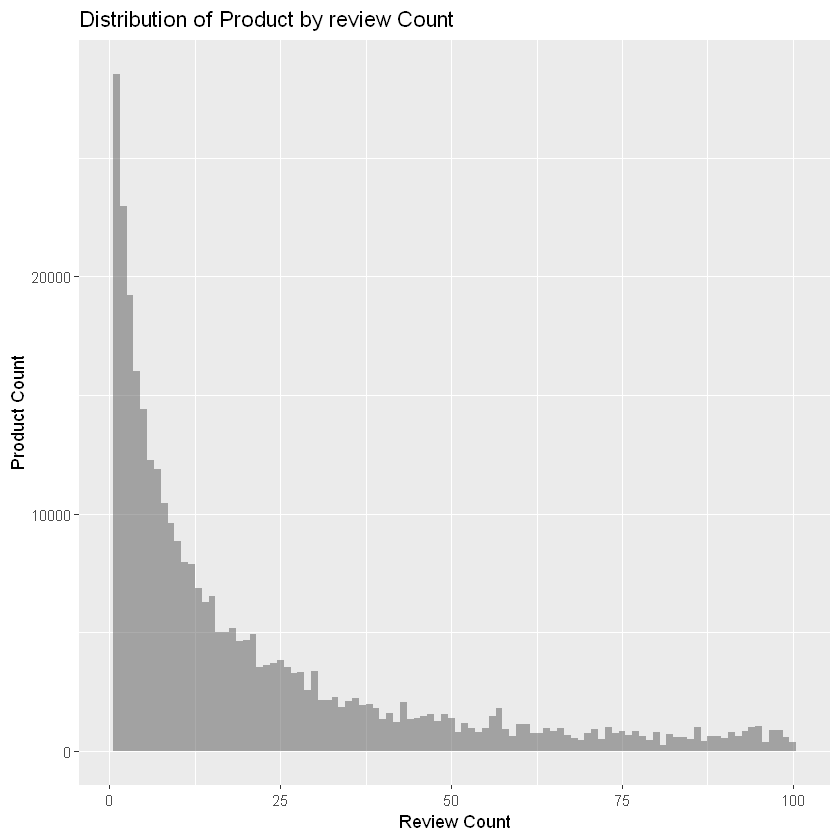

In [21]:
#distribution of product by review count
reviews2 %>%
    group_by(ProductId) %>%
    filter(count <= 100) %>%
    ggplot(aes (x =count)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
    labs(x = 'Review Count', y = 'Product Count',
        title = 'Distribution of Product by review Count')

Majority of Product has only been reviewed once thus there is high potential for bias

In [22]:
print(paste('Number of Unique Product:', length(unique(reviews2$ProductId))))

[1] "Number of Unique Product: 67738"


In [23]:
print(paste('Number of Unique user:', length(unique(reviews2$UserId))))

[1] "Number of Unique user: 256057"


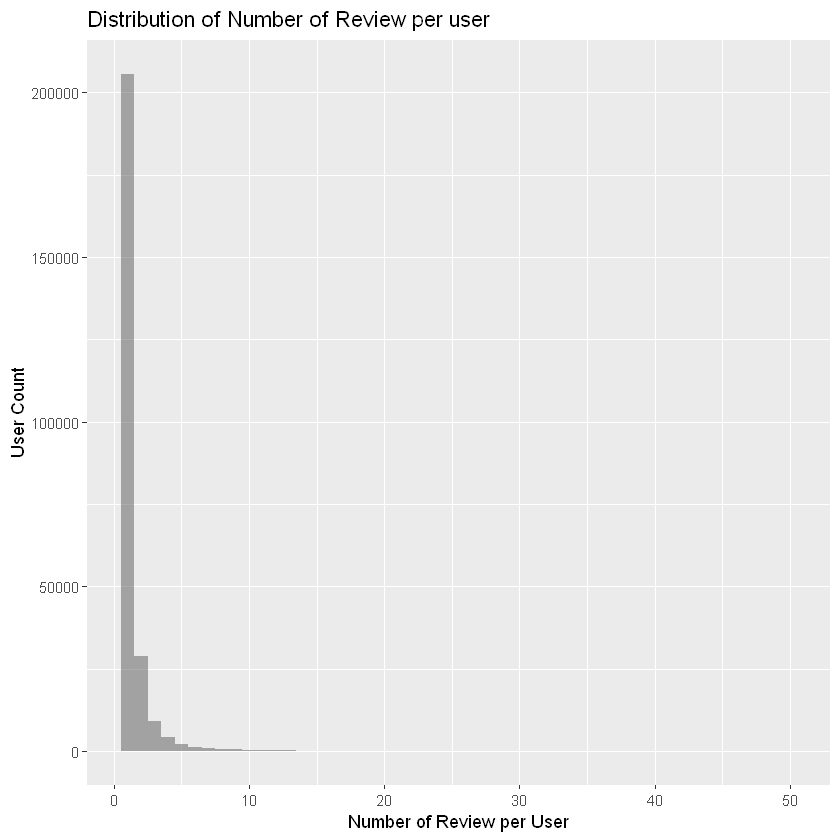

In [24]:
reviews2%>%
    group_by(UserId) %>%
    summarize(rev_count = n()) %>%
    filter(rev_count <= 50) %>%
    ggplot(aes(x = rev_count)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
    labs(x = 'Number of Review per User', y = 'User Count', 
        title = "Distribution of Number of Review per user")

Similar to number of review received by each product, majority of user only reviewed less than 5 items

In [25]:
#median count of product
median_count <- median(reviews2$count)
median_count

[1] 17

In [26]:
reviews3 <- reviews2%>%
    group_by(UserId) %>%
    summarize(rev_count = n())

In [27]:
median(reviews3$rev_count)

[1] 1

In [28]:
#Some of the products are reviewed much lesser than another thus there may be bias from lack of review data / 
# as small number of reviewers may be biased resulting in biased scoring. 
# we filter out products which received less than median count of review

review_final <- reviews2 %>%
    filter(count >= median_count)
    

In [29]:

# we will filter out reviewers who have reviewed 10 times or less

reviews3_f <- reviews3 %>%
    filter(rev_count > 10)

In [30]:
review_final_small <- review_final[review_final$UserId %in% reviews3_f$UserId,]

In [31]:
dim(review_final_small)

[1] 25859     9

In [32]:
head(review_final_small)

,ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
68,B00002N8SM,76883,A29GWIJL72GXXZ,jon123,1,ONLY CAUGHT 1 FLY,"Bought at my local Hardware Store. I was having a terrible fly problem, and it only trapped one (1) fly (it's been over a year now, still hanging, still just the same one fly.<br /><br />DON'T BUY THIS PRODUCT!","ONLY CAUGHT 1 FLY Bought at my local Hardware Store. I was having a terrible fly problem, and it only trapped one (1) fly (it's been over a year now, still hanging, still just the same one fly.<br /><br />DON'T BUY THIS PRODUCT!",38
127,B00004RAMX,131237,A11A9AVEM5EVU4,"James Papas """"Treecat""""",5,"Yep, it kills golphers","You may have to figure out how to set them up right in the holes, it takes a while to get good at catching them. But, I have really put a significant dent the golpher population that is attacking my gardens.","Yep, it kills golphers You may have to figure out how to set them up right in the holes, it takes a while to get good at catching them. But, I have really put a significant dent the golpher population that is attacking my gardens.",25
179,B00004RAMY,209055,A2JP9E1H0SF392,CDubya,5,The ONLY trap you need!!! Simply AWESOME.,"This trap is great. I've read the reviews and once you get the hang of setting this trap, you realize it is simply awesome. As mentioned by others: DO NOT FOLLOW THE BOX INSTRUCTIONS.<br /><br />What you need to do:<br />1- bend the trigger down a little<br />2- use spade shovel in the turf to make slots (2) for the jaws.<br />3- use good sized wood chips to obstruct an active run near the surface--enough so that the trigger rests on the wood when placed.<br />4- check trap daily...you'll be surprised how many moles use the same run.<br /><br />Once I figured this trap out, I've killed 6 in the very first 2 weeks!!!<br /><br />***WARNING: check the laws in your city/state. These traps may be prohibited. One of my neighbors called the animal warden on me and he confiscated 3 of my Victor traps claiming that they are """"leghold, steel-jawed traps"""". I will be going to court soon...","The ONLY trap you need!!! Simply AWESOME. This trap is great. I've read the reviews and once you get the hang of setting this trap, you realize it is simply awesome. As mentioned by others: DO NOT FOLLOW THE BOX INSTRUCTIONS.<br /><br />What you need to do:<br />1- bend the trigger down a little<br />2- use spade shovel in the turf to make slots (2) for the jaws.<br />3- use good sized wood chips to obstruct an active run near the surface--enough so that the trigger rests on the wood when placed.<br />4- check trap daily...you'll be surprised how many moles use the same run.<br /><br />Once I figured this trap out, I've killed 6 in the very first 2 weeks!!!<br /><br />***WARNING: check the laws in your city/state. These traps may be prohibited. One of my neighbors called the animal warden on me and he confiscated 3 of my Victor traps claiming that they are """"leghold, steel-jawed traps"""". I will be going to court soon...",172
218,B00004RAMY,209094,A1ER5AYS3FQ9O3,"K. Corn """"reviewer""""",5,They work but can you bring yourself to use them?,"I admit it - I'm very, very ambivalent about harming any creature, even one that tears up our lawn the way moles do. But after one of our kids fell and nearly broke a leg in one of the numerous mole holes in our yard we (reluctantly) decided to cut down on the mole invasion. We did not want or need another emergency trip to the doctor's office. We also have elderly parents who visit often and the thought of THEIR falling was frightening to us.<br /><br /> Bottom line on these traps - THEY WORK. If you want a trap that quickly kills moles, these do. They also seem to keep suffering to a minimum. I'm not even sure the moles DO suffer because I was walking to the mailbox and felt one of these traps go off. The mole was dead by the time I pulled it out, less than a min

In [33]:
# Most reviewed product
review_final_small %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count) %>%
    head()

ProductId,count
<chr>,<int>
B002IEZJMA,328
B0041NYV8E,305
B006MONQMC,304
B002IEVJRY,303
B002LANN56,262
B0090X8IPM,246


In [34]:
# Unique user
length(unique(review_final_small$UserId))

[1] 2127

In [35]:
# Unique product
length(unique(review_final_small$ProductId))

[1] 3619

In [36]:
# remove earlier count done at full dataset
review_final_small$count = NULL

In [37]:
dim(review_final_small)

[1] 25859     8

In [38]:
# Re run review Count for each product in the subset only
p_count <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [39]:
# Mean score for each product
mean_score <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(mean_score = mean(Score))

In [40]:
# merge p_count to reviews2
review_final_small <- merge(review_final_small, p_count, by.x = 'ProductId', by.y = 'ProductId', all.x = TRUE)

In [41]:
# merge mean_score to reviews2
reviews_final_small <- merge(review_final_small, mean_score, by.x = 'ProductId', by.y = 'ProductId', all.x = TRUE)

In [42]:
head(review_final_small)

ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
B00002N8SM,76883,A29GWIJL72GXXZ,jon123,1,ONLY CAUGHT 1 FLY,"Bought at my local Hardware Store. I was having a terrible fly problem, and it only trapped one (1) fly (it's been over a year now, still hanging, still just the same one fly.<br /><br />DON'T BUY THIS PRODUCT!","ONLY CAUGHT 1 FLY Bought at my local Hardware Store. I was having a terrible fly problem, and it only trapped one (1) fly (it's been over a year now, still hanging, still just the same one fly.<br /><br />DON'T BUY THIS PRODUCT!",1
B00004RAMX,131237,A11A9AVEM5EVU4,"James Papas """"Treecat""""",5,"Yep, it kills golphers","You may have to figure out how to set them up right in the holes, it takes a while to get good at catching them. But, I have really put a significant dent the golpher population that is attacking my gardens.","Yep, it kills golphers You may have to figure out how to set them up right in the holes, it takes a while to get good at catching them. But, I have really put a significant dent the golpher population that is attacking my gardens.",1
B00004RAMY,209055,A2JP9E1H0SF392,CDubya,5,The ONLY trap you need!!! Simply AWESOME.,"This trap is great. I've read the reviews and once you get the hang of setting this trap, you realize it is simply awesome. As mentioned by others: DO NOT FOLLOW THE BOX INSTRUCTIONS.<br /><br />What you need to do:<br />1- bend the trigger down a little<br />2- use spade shovel in the turf to make slots (2) for the jaws.<br />3- use good sized wood chips to obstruct an active run near the surface--enough so that the trigger rests on the wood when placed.<br />4- check trap daily...you'll be surprised how many moles use the same run.<br /><br />Once I figured this trap out, I've killed 6 in the very first 2 weeks!!!<br /><br />***WARNING: check the laws in your city/state. These traps may be prohibited. One of my neighbors called the animal warden on me and he confiscated 3 of my Victor traps claiming that they are """"leghold, steel-jawed traps"""". I will be going to court soon...","The ONLY trap you need!!! Simply AWESOME. This trap is great. I've read the reviews and once you get the hang of setting this trap, you realize it is simply awesome. As mentioned by others: DO NOT FOLLOW THE BOX INSTRUCTIONS.<br /><br />What you need to do:<br />1- bend the trigger down a little<br />2- use spade shovel in the turf to make slots (2) for the jaws.<br />3- use good sized wood chips to obstruct an active run near the surface--enough so that the trigger rests on the wood when placed.<br />4- check trap daily...you'll be surprised how many moles use the same run.<br /><br />Once I figured this trap out, I've killed 6 in the very first 2 weeks!!!<br /><br />***WARNING: check the laws in your city/state. These traps may be prohibited. One of my neighbors called the animal warden on me and he confiscated 3 of my Victor traps claiming that they are """"leghold, steel-jawed traps"""". I will be going to court soon...",3
B00004RAMY,209094,A1ER5AYS3FQ9O3,"K. Corn """"reviewer""""",5,They work but can you bring yourself to use them?,"I admit it - I'm very, very ambivalent about harming any creature, even one that tears up our lawn the way moles do. But after one of our kids fell and nearly broke a leg in one of the numerous mole holes in our yard we (reluctantly) decided to cut down on the mole invasion. We did not want or need another emergency trip to the doctor's office. We also have elderly parents who visit often and the thought of THEIR falling was frightening to us.<br /><br /> Bottom line on these traps - THEY WORK. If you want a trap that quickly kills moles, these do. They also seem to keep suffering to a minimum. I'm not even sure the moles DO suffer because I was walking to the mailbox and felt one of these traps go off. The mole was dead by the time I pulled it out, less than a minute later.<br /><br /

In [43]:
# double check for duplicate review text
nrow(review_final_small[duplicated(review_final_small$combine_summary),])

[1] 0

In [44]:
p_count <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [45]:
max(review_final_small$count)

[1] 328

In [46]:
dim(review_final_small)

[1] 25859     9

## Collaborative Filtering

In [47]:
# select only ProductId, UserId, Score
review_cf <- review_final_small[,c(3,1,5)]

In [48]:
summary(review_cf$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.069   5.000   5.000 

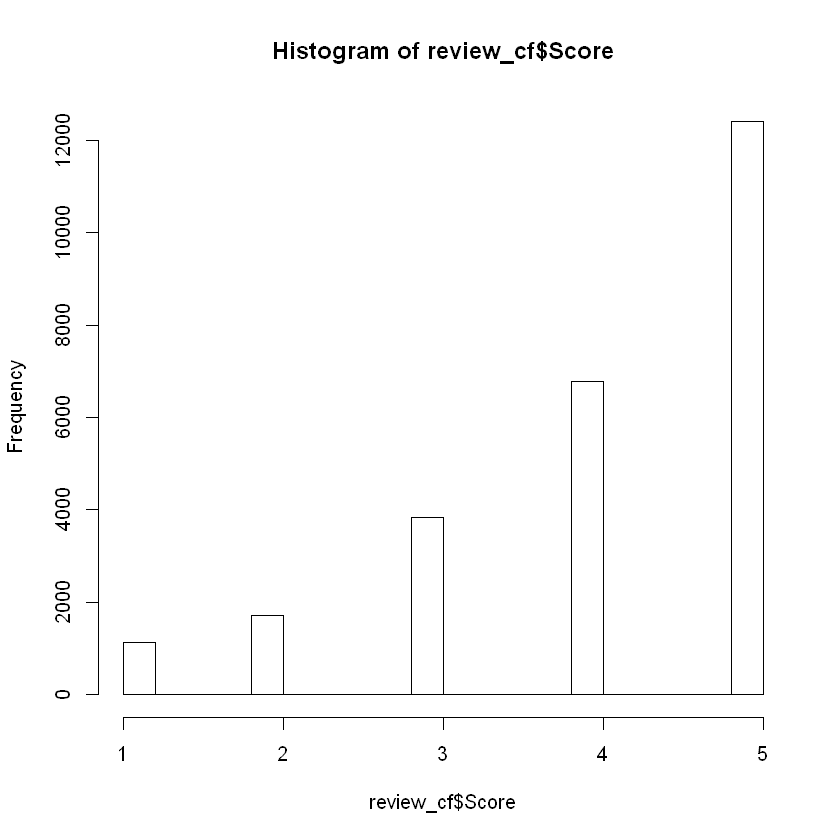

In [49]:
hist(review_cf$Score)

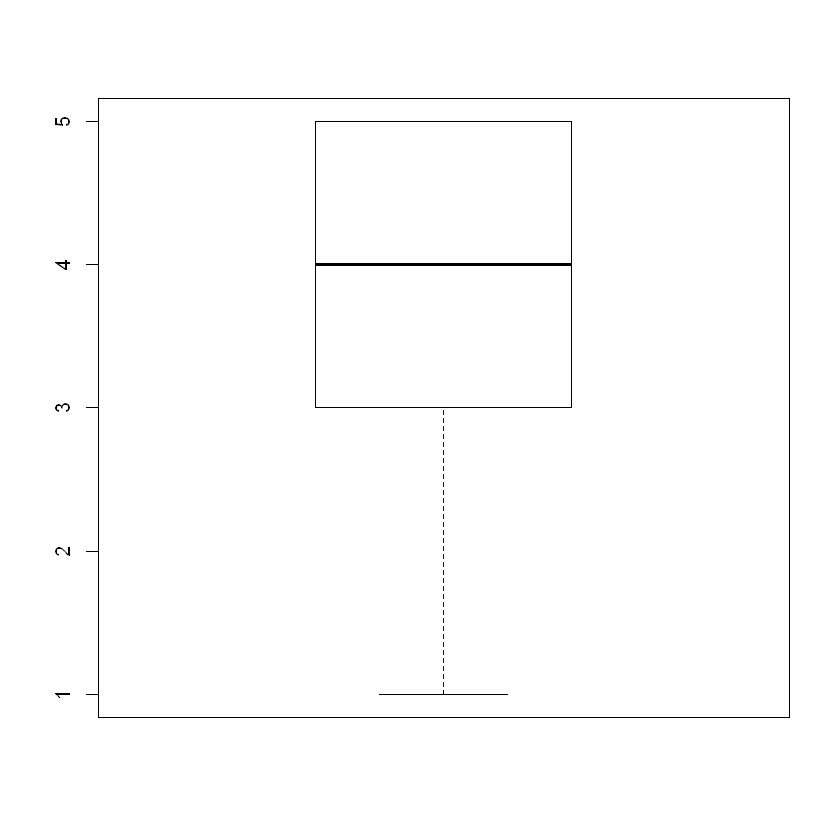

In [50]:
boxplot(review_cf$Score)

The Score is positive skewed as confirmed by the summary statistics

In [51]:
head(review_cf)

UserId,ProductId,Score
<chr>,<chr>,<int>
A29GWIJL72GXXZ,B00002N8SM,1
A11A9AVEM5EVU4,B00004RAMX,5
A2JP9E1H0SF392,B00004RAMY,5
A1ER5AYS3FQ9O3,B00004RAMY,5
AHIK7BUXFRMT8,B00004RAMY,5
ACR4HKUT808U1,B00004RBDU,5


In [52]:
length(unique(review_final_small$UserId))
length(unique(review_final_small$ProductId))

[1] 2127

[1] 3619

In [53]:
review_final_small %>%
    group_by(UserId) %>%
    summarize(count = n()) %>%
    arrange(-count) %>%
    tail()

UserId,count
<chr>,<int>
AJ01XUSUA6WM2,1
AQ0BWW19DY5KE,1
ARVQ4KDMT0FS9,1
AUTBHG6070SL4,1
AWEM0VJCIHTXU,1
AYJAI24K10JQ4,1


There are more user than product thus Item Based Collaborative Filtering is more efficient

## Recommender Lab IBCF

In [54]:
## RECOMMENDER LAB IBCF ##

# set data format
review_cf$UserId <- as.factor(review_cf$UserId)
review_cf$ProductId <- as.factor(review_cf$ProductId)
review_cf$Score <- as.numeric(review_cf$Score)

In [55]:
###############################################################################################

In [56]:
## Evaluate Model Performance

In [57]:
set.seed(123)


In [58]:
review_cf <- review_cf %>%
    arrange(UserId, ProductId)

In [59]:
#Create sparse matrix
review_spmatrix <- sparseMatrix(i = as.integer(review_cf$UserId),
                               j = as.integer(review_cf$ProductId),
                               x = review_cf$Score,
                               dimnames = list(unique(review_cf$UserId), 
                                               unique(review_cf$ProductId))
                                )

In [60]:
dim(review_spmatrix)

[1] 2127 3619

In [61]:
review_spmatrix[1:10,1:5]

10 x 5 sparse Matrix of class "dgCMatrix"
               B00004RBDU B0002XAFTG B000H7ELTW B000H7LVKY B0016PC4TS
A100WO06OQR8BQ          .          .          .          1          .
A1051DBTLWP5A2          .          .          .          .          .
A105S56ODHGJEK          .          .          .          .          .
A106ZCP7RSXMRU          .          .          .          .          .
A1076UA29SK59D          .          .          .          .          .
A1080SE9X3ECK0          .          .          .          .          .
A108XP24UESKSV          .          .          .          .          .
A109L3WXD1SJFU          .          .          .          .          .
A10AFVU66A79Y1          .          .          .          .          .
A10DRHWKS6NQUX          .          .          .          .          .

In [62]:
# Sparse matrix has much smaller size
print(object.size(review_spmatrix), units = 'auto')

722.8 Kb


In [63]:
## format sparse matrix for recommenderlab library
review_sprrm <- as(review_spmatrix, 'realRatingMatrix')

In [64]:
review_sprrm

2127 x 3619 rating matrix of class 'realRatingMatrix' with 25859 ratings.

In [65]:
dim(review_sprrm)

[1] 2127 3619

In [66]:
print(object.size(review_sprrm), units = 'auto')

723.5 Kb


In [67]:
# check structure of the realRatingMatrix
getRatingMatrix(review_sprrm[c(10:15),c(10:14)])

6 x 5 sparse Matrix of class "dgCMatrix"
               B002TMV3GC B0045XE32E B004E4CCSQ B004E4EBMG B004FELBH8
A10DRHWKS6NQUX          .          .          .          .          .
A10E3F50DIUJEE          .          .          .          .          .
A10FL3TBQ7TI48          .          .          .          .          .
A10LIGIT9EGCM9          .          .          .          .          .
A10PEXB6XAQ5XF          .          .          .          .          .
A10TYGME2FQHO7          .          .          .          .          .

In [68]:
#image(review_sprrm, main = "Raw Ratings")

There are a few ways to evaluate IBCF models <br>
We will attempt the following models: <br>
IBCF_N_C -> Item based collaborative filtering with no normalisation with cosine similarity metric<br>
IBCF_C_C -> Item based collaborative filtering with centering and cosine similarity metric <br>
IBCF_Z_C -> Item based collaborative filtering with z score normalisation and cosine similarity metric<br>

In [69]:
###############################################################
# simple user-user and item-item collaborative filtering
# using ratings data in tabular format (rows as users, columns as items)
################################################################

library(Matrix)
library(stringr)
library(reshape2)
library(compiler)

# Make recommendations for the target user using User-based CF
getrecommendations_UU <- function(targetuser, users, topN=5, simfun=pearsonsim) {
  sims = apply(users,1,function(user) simfun(user,targetuser)) 
  sims = sims[!is.na(sims) & sims >=0] # get rid of any similarity less than 0
  wavrats = apply(users[names(sims),is.na(targetuser), drop=FALSE],2,function(rats) weighted.mean(rats, sims, na.rm=TRUE)) #computer weighted average rating for every non Toby user 
  s = sort(wavrats[!is.na(wavrats)], decreasing = TRUE) 
  if (topN == FALSE) s else s[1:min(topN,length(s))] # get topN items
}
#getrecommendations_UU = cmpfun(getrecommendations_UU)

# get recommedations for the target user using Item-based CF
getrecommendations_II <- function(targetuser, itemsims, topN=5) {
  targetuser = targetuser[colnames(itemsims)] # ensure the item order is the same as simmatrix
  seenitems  = !is.na(targetuser)
  unseenitems = is.na(targetuser)
  seenrats = targetuser[seenitems]
  preds = apply(itemsims[unseenitems,seenitems, drop=FALSE], 1, function(simrow) my.weighted.mean(seenrats, simrow))
  sp = sort(preds[!is.na(preds)] , decreasing = TRUE)
  sp[1:min(topN,length(sp))]  # get topN items
}
getrecommendations_II = cmpfun(getrecommendations_II)

# compute the item-item similarity matrix (the matrix is symmetric so can compute half & then copy)
# (setting dir=1 generates the user similarity matrix)
getitemsimsmatrix = function(users, simfun=cosinesim, dir=2) {
  rw <<- 1; 
  itemsims = apply(users, dir, function(itemA) {
    rw <<- rw + 1 ; cl <<- 1; 
    apply(users,dir,function(itemB) {cl<<-cl+1; if (cl<rw) NA else if (cl==rw) NA else simfun(itemA,itemB)})
  })
  m = forceSymmetric(itemsims,uplo="L") # copy lower half to upper half
  as.matrix(m)
}
getitemsimsmatrix = cmpfun(getitemsimsmatrix)

# similarity functions
euclidsim = function(x,y) { z=(y-x)^2; sz=sqrt(sum(z,na.rm=TRUE));
                            if (sz!=0) 1/(1+sz) else if (length(which(!is.na(z)))==0) NA else 1/(1+sz)}

euclidsimF= function(x,y) { z=(y-x)^2; sz=sum(z,na.rm=TRUE);
                            if (sz!=0) 1/(1+sz) else if (length(which(!is.na(z)))==0) NA else 1/(1+sz)} 

cosinesim = function(x,y) { xy = x*y; sum(xy, na.rm=TRUE)/(sqrt(sum(x[!is.na(xy)]^2)*sum(y[!is.na(xy)]^2)))}

pearsonsim= function(x,y) { suppressWarnings(cor(unlist(x),unlist(y),use="pairwise.complete.obs")) }

mypearsim = function(x,y) { xy = x*y; x=x[!is.na(xy)]; y=y[!is.na(xy)]; 
                            mx=mean(x); my=mean(y);
                            sum((x-mx)*(y-my))/(sqrt(sum((x-mx)^2)*sum((y-my)^2)))}

pearsonRM = function(x,y) { mx=mean(x,na.rm=TRUE);my=mean(y,na.rm=TRUE);
                            xy=x*y;x=x[!is.na(xy)]; y=y[!is.na(xy)]
                            sum((x-mx)*(y-my))/(sqrt(sum((x-mx)^2)*sum((y-my)^2)))}

jacardsim = function(x,y) { validx= !is.na(x); validy= !is.na(y); 
                            sum(as.integer(validx&validy))/sum(as.integer(validx|validy))}

###############################################################################
# For testing, we split the data by user, so test users are not in the trainset
# This is clean but does not test the situation where partial information 
# is known about a user (as may be the case in User-based scenario).
# For item-based having partial info will make very little difference (since simmatrix is precomputed)
###############################################################################

# make predicted ratings for a sample of items for each test user
# if trainusers is defined then do User-based CF else do Item-based CF
# Note: if Item-based CF is to be performed them the itemsimilarity matrix (itemsims) must be defined
predictCF = function(testusers, trainusers=NULL, itemsims=NULL, numtestitems=10, random=FALSE, simfun=cosinesim) {
  preds = sapply(1:nrow(testusers),function(i) {
    cat(".")
    predictuser(testusers[i,],trainusers=trainusers,itemsims=itemsims,numtestitems=numtestitems,random=random,simfun=simfun)})
  colnames(preds) = rownames(testusers)
  preds
}

predictuser <- function(testuser, trainusers=NULL, itemsims=NULL, numtestitems=10, random=FALSE, simfun=cosinesim) {
  seenitemnames   = names(testuser)[!is.na(testuser)]
  if (random) testitemnames = sample(seenitemnames,min(numtestitems,length(seenitemnames))) # test a random N items
  else testitemnames = seenitemnames[1:min(numtestitems,length(seenitemnames))] # test first N items
  preds = list()
  for (testitemname in testitemnames) {
    truerating = testuser[testitemname] 
    testuser[testitemname] = NA
    if (!is.null(trainusers)) {
      # do user-based CF
      usersims = apply(trainusers,1,function(trainuser) simfun(trainuser,testuser))
      usersims = usersims[!is.na(usersims) & usersims >=0]
      predictedrating = my.weighted.mean(trainusers[names(usersims),testitemname], usersims)
    }
    else {
      # do item-based CF
      predictedrating = my.weighted.mean(testuser[seenitemnames], itemsims[seenitemnames,testitemname])
    }
    testuser[testitemname] = truerating # restore the actual rating
    preds = c(preds,predictedrating,truerating)
  }
  preds = unname(preds)
  m = as.matrix(preds)
  if (length(m) < numtestitems*2) for (i in (length(m)+1):(numtestitems*2)) { m = rbind(m,NA)}
  return(m)
}
predictuser= cmpfun(predictuser)

# a weighted mean that handles NA's in both arguments (ratings and similarities)
my.weighted.mean = function(x,y) {
    xy = x*y; 
    z = sum(abs(y[!is.na(xy)]))
    if (z == 0) as.numeric(NA) else sum(xy,na.rm=TRUE)/z 
}
my.weighted.mean = cmpfun(my.weighted.mean)

# computes average, mean absolute error
# each row contains prediction, actual, prediction, actual etc, hence errors are just the diff between consecutive cells
avgMAE = function(preds) {
  plist = unlist(preds)
  errors = sapply(1:(length(plist)/2),function(i) abs(plist[i*2-1]-plist[i*2]))
  errors = errors[errors != Inf]
  mean(errors,na.rm=TRUE)
}

showCM = function(preds, like) {
  plist = unlist(preds)
  cnts = sapply(1:(length(plist)/2), function(i) {
    pred = plist[i*2-1] ; actual = plist[i*2]
    if (!is.na(pred) & !is.nan(actual)) {
      if (pred>=like) {if(actual>=like) c(1,0,0,0) else c(0,1,0,0)}
      else if(actual<like) c(0,0,1,0) else c(0,0,0,1) 
    } else c(0,0,0,0)
  })
  s = rowSums(cnts)   #returns cnts for: TP, FP, TN, FN

  cat(sprintf("TN=%5d FP=%5d\n",s[3],s[2]))
  cat(sprintf("FN=%5d TP=%5d  (total=%d)\n",s[4],s[1], sum(s)))
  cat(sprintf("accuracy  = %0.1f%%\n",(s[1]+s[3])*100/sum(s)))
  cat(sprintf("precision = %3.1f%%\n",s[1]*100/(s[1]+s[2])))
  cat(sprintf("recall    = %3.1f%%\n",s[1]*100/(s[1]+s[4])))
}

#######################
# miscellaneous aids
#######################

maketraintest = function(users,numtestusers) {
  testnames  = sample(rownames(users), min(numtestusers,nrow(users))) # identify N users randomly for testing
  trainnames = setdiff(rownames(users),testnames) # take remaining users for training
  trainusers <<- users[trainnames,]
  testusers  <<- users[testnames,]
  list(trainusers,testusers)
}

# extract only prediction or only actual ratings from the output of predictCF()
listpreds= function(results) {unlist(results)[c(TRUE,FALSE)]}
listrats = function(results) {unlist(results)[c(FALSE,TRUE)]}
validcnt = function(x) length(which(is.finite(x)))

# How sparse is the data in a data frame? Compute % of non-blank entries
fillrate = function(df) {cat((length(which(!is.na(df)))*100)/(nrow(df)*ncol(df)),"%")}
fillrate = cmpfun(fillrate)

# same as above but also works on vectors
fillratev = function(df) {t=unlist(df); cat((length(which(!is.na(t)))*100)/length(t),"%")}
fillratev = cmpfun(fillratev)

# how many values are > 0? Compute % of entries > 0
fillrateG = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t > thresh))*100)/length(t),"%")}
fillrateL = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t < thresh))*100)/length(t),"%")}
fillrateE = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t == thresh))*100)/length(t),"%")}






Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt

The following object is masked from 'package:tidyr':

    smiths



In [70]:
# Split the data into training and testing subsets on 80/20, 
# any rating greater than 3 is considered positive rating
given <- 1 #refer to https://stackoverflow.com/questions/30128383/error-evaluationscheme-recommenderlab-in-r
# some of the UserId only has 1 review so the given value cannot be more than 1
rating_threshold <- 4 # set 4 and above considered positive
eval <- evaluationScheme(review_sprrm, method = 'split', train = 0.8, given = given, goodRating = rating_threshold)

In [71]:
#IBCF with cosine similarity and not normalized data for k most similar items
IBCF_N_C <- Recommender(data = getData(eval, 'train'),
                        method = "IBCF", 
                        parameter = list(normalize = NULL, 
                                         method = 'Cosine', k = 30))

In [72]:
# IBCF with cosine similarity and centered data for k most similar items
IBCF_C_C <- Recommender(data = getData(eval, 'train'), 
                        method = 'IBCF', 
                        parameter = list(normalize = "center", method = "Cosine", k = 30))

In [73]:
# IBCF with cosine similarity and z-score normalised data for k most similar item
IBCF_Z_C <- Recommender(data = getData(eval, 'train'),
                       method = 'IBCF',
                       parameter = list(normalize = "Z-score", method = 'Cosine', k = 30))

In [74]:
# Popular Model
POP <- Recommender(data = getData(eval, 'train'), method = 'POPULAR', param = list(normalize = 'center'))

In [75]:
# Evaluation of IBCF
pIBCF_N_C <- predict(IBCF_N_C, getData(eval, 'known'), type = 'ratings')
pIBCF_C_C <- predict(IBCF_C_C, getData(eval, 'known'), type = 'ratings')
pIBCF_Z_C <- predict(IBCF_Z_C, getData(eval, 'known'), type = 'ratings')

In [76]:
pPOP <- predict(POP, getData(eval, 'known'), type = 'ratings')

In [77]:
# Performance statistics
perf_stats <- rbind(
    IBCF_N_C = calcPredictionAccuracy(pIBCF_N_C, getData(eval, 'unknown')),
    IBCF_C_C = calcPredictionAccuracy(pIBCF_C_C, getData(eval, 'unknown')),
    IBCF_Z_C = calcPredictionAccuracy(pIBCF_Z_C, getData(eval, 'unknown')),
    pPOP = calcPredictionAccuracy(pPOP, getData(eval, 'unknown'))
    )

In [78]:
perf_stats

,RMSE,MSE,MAE
IBCF_N_C,1.423427,2.026144,0.9281046
IBCF_C_C,1.341641,1.800000,1.0000000
IBCF_Z_C,1.290994,1.666667,1.0000000
pPOP,1.532423,2.348321,1.1246631


So far best performing model is IBCF on cosine similarity without normalisation

In [79]:
#rm(IBCF_N_C, IBCF_C_C, IBCF_Z_C)

In [80]:
IBCF_N_C

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 1701 users.

In [81]:
#pred <- predict(IBCF_N_C, review_sprrm[1,])

Apply Recommender on test Data

In [82]:
# predict items for user
pred<-predict(IBCF_N_C, getData(eval,'unknown'), type = 'ratings')

In [83]:
# item - item cosine similarity matrix
as(pred, 'matrix')[100:150, 200:250]

,B000PGQQFC,B000Z4SWII,B000Z4WRXE,B0009P5EJS,B000EVMNNC,B000EVT04M,B000GZ1BNE,B000LKZ61W,B000SDKDM4,B000V17MLS,...,B001ET5Y1G,B000S0XFNQ,B001CD7AUC,B002WD93EW,B0015AWU7U,B002NHYQAS,B00351JWTQ,B004BKLHOS,B000CQBZQK,B000FFIEL2
A1ZU55TM45Y2R8,4.000000,NA,1.000000,3.000000,NA,NA,2,NA,4.000000,NA,...,NA,NA,NA,4.250000,4.0,2.857143,NA,4.0,3.5,NA
A1ZZR25X0CNOJX,3.000000,NA,3.500000,4.000000,2.5,NA,4,NA,5.000000,NA,...,4.000000,NA,NA,4.500000,4.0,NA,NA,NA,NA,NA
A1ZZZT0KJR46UV,NA,NA,5.000000,4.833333,NA,NA,5,NA,4.000000,NA,...,5.000000,NA,NA,5.000000,5.0,4.750000,NA,NA,4.0,NA
A2065HBMYDXJ1S,4.000000,NA,3.666667,4.000000,4.0,NA,NA,NA,4.000000,NA,...,NA,NA,NA,4.000000,4.0,3.800000,NA,NA,4.0,NA
A209G57KXCBF4C,4.000000,NA,2.750000,2.333333,4.0,NA,NA,NA,2.250000,NA,...,4.000000,1.000000,NA,2.666667,3.5,NA,NA,NA,NA,3
A20EEWWSFMZ1PN,NA,NA,4.000000,NA,4.0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A20H1M28WLI9J2,NA,NA,4.750000,3.333333,5.0,NA,5,NA,4.000000,NA,...,4.000000,NA,NA,3.000000,4.0,NA,NA,4.0,4.0,NA
A215P85W653CZV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A216NSW58Q3SCJ,5.000000,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A21B8AV7E3MPXE,2.000000,NA,5.000000,4.500000,4.0,NA,5,NA,5.000000,NA,...,5.000000,4.333333,NA,2.000000,NA,3.500000,NA,NA,5.0,NA


In [84]:
n_recommend <- 5 # number of items
pred<-predict(IBCF_N_C, getData(eval,'unknown'), n = n_recommend)

In [85]:
as(pred, "list")

$A105S56ODHGJEK
[1] "B0045XE32E" "B004OQ257M" "B006BXUYN8" "B000HJPBGC" "B000LKUAK4"

$A1076UA29SK59D
character(0)

$A10TYGME2FQHO7
[1] "B002LANN56" "B001189I3A" "B0013E7C0S" "B002ZOCEMG" "B000V17MLS"

$A11ED8O95W2103
[1] "B000GZSDPS" "B001E5E074" "B002NHYQAS" "B000PJ8RY2" "B000HE6PR6"

$A11EIDY6DD40CS
[1] "B003VQXYMQ" "B0009P5EJS" "B0030GQHXA" "B001CPUPMA" "B000ET4SM8"

$A11OTLEDSW8ZXD
[1] "B000V6FU08" "B0013E7C0S" "B000FBM4FI" "B005QRPH3M" "B0041CIR62"

$A135XHGMBR0OWF
[1] "B004TPKAN4" "B008AV5HLS" "B001EO5Y8E" "B001P3PR5Y" "B0028UA2NA"

$A137Y8DXKXIEJ
[1] "B000LKX01K" "B001EQ5FO0" "B000HDJZEM" "B005BPVE5Y" "B000EDM70Y"

$A13T0V3LHOTHDL
[1] "B003XDH6M6" "B000FA8SH2" "B000HDL1P8" "B0085G4ACA" "B000E671XY"

$A13WOT3RSXKRD5
[1] "B0090X8IPM" "B002AUF0Q2" "B004JGQ16I" "B003GSK4CW" "B007K449CE"

$A147FUNITGB21I
[1] "B0016PC4TS" "B007JT7AEY" "B007JT7ARQ" "B000HDKZKU" "B000J423MK"

$A14L15JM990MBP
[1] "B001ABTGF8" "B0001ES9F8"

$A14X244VGHWPSX
[1] "B000H7ELTW" "B004E4CCSQ" "B002OK6E6I" "B001OCKIBY" "B007I7Z3Z0"

$A1501C38OCSEMA
[1] "B001E5DWW8" "B0060JNAE8" "B001EO5QZK" "B000FDMLVI" "B001ACNWUC"

$A16PUD6V3KAZ0Q
[1] "B004OQ257M" "B0041CIP3M" "B00153C4B4" "B002ESMK4U" "B002EY5TTW"

$A175N19FS2B4J
[1] "B00295IGHS" "B000AYFAMO" "B000DZDJ0K" "B005EV2EJA" "B005A1LJ04"

$A17GK9E70O7Y9R
[1] "B006BXUY2Y" "B007JT7AEY" "B000J423MK" "B001189I3A" "B002AQL00G"

$A18FUHNBP90IB4
[1] "B004E4CCSQ" "B004JGQ15E" "B007JT7AEY" "B007KIOBMS" "B000HDKZKU"

$A18LBGL7L9FEZV
[1] "B001F1U5WG" "B000H7LVKY" "B0016PC4TS" "B004JGQ15E" "B004YV80O4"

$A18TST0YO1NN2
[1] "B000FFRTYK" "B003POD8O8" "B002C56OIS" "B0029YDR82" "B000ILEIUE"

$A18WKADVOE3BJI
[1] "B001KVPC0G" "B001CPUPMA" "B002UKH434" "B001EQ5F04" "B004650TGU"

$A18ZP8SFD2VC3A
[1] "B002E0S4UW" "B002RBOCZE" "B0034KP00S" "B002Y2E7NS" "B000XQ5HDQ"

$A19123D9G66E0O
[1] "B001CFMGGI" "B001BDDTB2" "B001EO5U60" "B000EVQWKC" "B005ZBZLT4"

$A19SDJ2TSSL8HI
[1] "B004OQ257M" "B004YV80OE" "B007RTR8T8" "B0001R05KC" "B001LG940E"

$A1A3VXAK3HR6U6
[1] "B0054TWQMM" "B000HE6PR6" "B005BPVE5Y" "B002KLLHF4" "B002UTCI2M"

$A1A9PD00UVHHVI
[1] "B004OQ257M" "B000G7X0OK" "B001LG940E" "B0041NYV8E" "B006Q7YFLQ"

$A1AEPMPA12GUJ7
[1] "B004TPKAN4" "B000Q5X876" "B003GVBN1A" "B000K8V1PA" "B000F4J73W"

$A1AF48ABEIIDOX
[1] "B001F1U5WG" "B004YV80OE" "B007RTR8T8" "B007RTR9G0" "B000LKX01K"

$A1AG7F4Z1EOO5L
[1] "B0030VBQOK" "B001ET5XXK" "B001BM62T4" "B000GINU0S" "B0035LYCPU"

$A1ALOTXWL76OY7
[1] "B0016PC4TS" "B004JGQ15E" "B0090X8IPM" "B000UUWECC" "B004JGQ15Y"

$A1B05INWIDZ74O
[1] "B001F1U5WG" "B001VJ0B0I" "B002AUF0Q2" "B0041CIP3M" "B004R8J8E0"

$A1BKJNAWJT2TG2
[1] "B004JGQ15E" "B002OK6E6I" "B0030H1WW0" "B000UUWECC" "B004TPKAN4"

$A1BKX9MC3YAKF8
[1] "B004OQ257M" "B000DZH19K" "B002ESMK4U" "B000FDDETG" "B000J41TB6"

$A1CFYV8RQ8L6DS
[1] "B000EMD1XW" "B0007R9L6K" "B001E5DYEE" "B000FKL0EU" "B0038B3AGO"

$A1CHOKV10NEI8X
[1] "B008AV5HLS" "B000EQT77M" "B004ZIER34" "B000FIULB0" "B001ZWHGFO"

$A1DJ9FOEOA0WF1
[1] "B004JGQ15E" "B007JT7AEY" "B0090X8IPM" "B000G1EO4G" "B000G7X0OK"

$A1EAH433QK3L3E
[1] "B000H7LVKY" "B001VJ0B0I" "B004R8J8E0" "B004R8J8EK" "B002ESMK4U"

$A1FPQ54AIB26L0
[1] "B006BXV14E" "B007JT7ARQ" "B007KIOBMS" "B007RTR9DS" "B002AUF0Q2"

$A1GNYV0RA0EQSS
[1] "B001VJ0B0I" "B004R8J8E0" "B004R8J8EK" "B003YBLF2E" "B000HDONP8"

$A1GQSBLU2QXDC9
[1] "B002AQL00G" "B001BM3C0Q" "B001G0NL2W" "B0013E7C0S" "B005SPQENY"

$A1H59OCYPG9G4T
[1] "B001EO5U60" "B001ELL3LY" "B001E5E1L4" "B003ULDYRW" "B000CQ01ME"

$A1H7Y5XKPGT0OS
[1] "B000HDKZKU" "B000J423MK" "B002AUF0Q2" "B0041CIR62" "B000FI701Y"

$A1HG82U7GY9531
[1] "B002D4DY8G" "B004JRMG98" "B004LL7AL6" "B006BXV176" "B000Z4SWII"

$A1HNE9Y9JBAN9Y
[1] "B002AQL00G" "B001BM3C0Q" "B0013E7C0S" "B005SPQENY" "B000EVMNNC"

$A1HRYC60VTMYC0
[1] "B007M832Y4" "B002AUF0Q2" "B007RTR8A2" "B0030H1WW0" "B001E52YO0"

$A1IHK8GL1ESOND
[1] "B001VJ0B0I" "B004JGQ15E" "B007RTR9DS" "B0090X8IPM" "B001EQ4E60"

$A1IQV6AI7L9NOK
[1] "B0045XE32E" "B000V6FU08" "B000FBM4FI" "B006BXUYN8" "B0041CIR62"

$A1IU7S4HCK1XK0
[1] "B007KIOBMS" "B002IEVJRY" "B0041CIP3

In [86]:
pred@items[[1]]

[1]  11  17 150 234 257

In [87]:
pred_matrix <- lapply(pred@items, function(x){
    colnames(review_sprrm)[x]
})

In [88]:
pred_matrix[1:4]

$A105S56ODHGJEK
[1] "B0045XE32E" "B004OQ257M" "B006BXUYN8" "B000HJPBGC" "B000LKUAK4"

$A1076UA29SK59D
character(0)

$A10TYGME2FQHO7
[1] "B002LANN56" "B001189I3A" "B0013E7C0S" "B002ZOCEMG" "B000V17MLS"

$A11ED8O95W2103
[1] "B000GZSDPS" "B001E5E074" "B002NHYQAS" "B000PJ8RY2" "B000HE6PR6"

In [89]:
# return column names of the items in index returned by pred
colnames(review_sprrm)[pred@items[[1]]]

[1] "B0045XE32E" "B004OQ257M" "B006BXUYN8" "B000HJPBGC" "B000LKUAK4"

In [90]:
review_cf$UserId[10001]

[1] A2K3J2X8KDY47N
2127 Levels: A100WO06OQR8BQ A1051DBTLWP5A2 A105S56ODHGJEK ... AZXKAH2DE6C8A

In [91]:
#user with highest number of review
review_cf %>%
    group_by(UserId) %>%
    summarize(count = n()) %>%
    arrange(-count) %>%
    head()

UserId,count
<fct>,<int>
A3OXHLG6DIBRW8,131
A281NPSIMI1C2R,78
A2Y8IDC1FKGNJC,74
AQLL2R1PPR46X,63
A2FRFAQCWZJT3Q,61
AKMEY1BSHSDG7,60


### Use IBCF_N_C to predict on new data

In [92]:
# list if item reviewed by this user
head(review_cf[review_cf$UserId %in% c('A281NPSIMI1C2R'),])

,UserId,ProductId,Score
,<fct>,<fct>,<dbl>
7918,A281NPSIMI1C2R,B0000C69FB,5
7919,A281NPSIMI1C2R,B0000DBN1F,5
7920,A281NPSIMI1C2R,B0000DBN2I,5
7921,A281NPSIMI1C2R,B0000VLTZY,5
7922,A281NPSIMI1C2R,B00016LA7K,5
7923,A281NPSIMI1C2R,B00016LA7U,5


In [93]:
# Try to recommend item to 1 specific user
#rec_item <- predict(IBCF_N_C, review_sprrm['A3IPGCVNG88DSR',], n= 5)
#rec_item <- predict(IBCF_N_C, review_sprrm['A26OPNLJ0JYHPH',], n = 5)
rec_item <- predict(IBCF_N_C, review_sprrm["A281NPSIMI1C2R",], n= 5 )

In [94]:
# display the recommendation
as(rec_item, "list")

$A281NPSIMI1C2R
[1] "B000H7ELTW" "B000H7LVKY" "B001VJ0B0I" "B004JGQ15E" "B004YV80O4"

In [95]:
getRatings(rec_item)

$A281NPSIMI1C2R
[1] 5 5 5 5 5

In [96]:
#pred_rating <- predict(IBCF_N_C, review_sprrm["A3IPGCVNG88DSR",], n= 10)
pred_rating <- predict(IBCF_N_C, review_sprrm['A281NPSIMI1C2R',], n = 10)

In [97]:
# display rating
as(pred_rating, "list")

$A281NPSIMI1C2R
 [1] "B000H7ELTW" "B000H7LVKY" "B001VJ0B0I" "B004JGQ15E" "B004YV80O4"
 [6] "B004YV80OE" "B007JFMH8M" "B002AUF0Q2" "B0014WYY1E" "B004R8J8E0"

In [98]:
getRatings(pred_rating)

$A281NPSIMI1C2R
 [1] 5 5 5 5 5 5 5 5 5 5

In [99]:
review_cf[review_cf$UserId %in% c('A281NPSIMI1C2R'),]

,UserId,ProductId,Score
,<fct>,<fct>,<dbl>
7918,A281NPSIMI1C2R,B0000C69FB,5
7919,A281NPSIMI1C2R,B0000DBN1F,5
7920,A281NPSIMI1C2R,B0000DBN2I,5
7921,A281NPSIMI1C2R,B0000VLTZY,5
7922,A281NPSIMI1C2R,B00016LA7K,5
7923,A281NPSIMI1C2R,B00016LA7U,5
7924,A281NPSIMI1C2R,B0001CXUHW,5
7925,A281NPSIMI1C2R,B0001I1HFS,5
7926,A281NPSIMI1C2R,B00020UGN4,5


## Alternating Least Square on Recosystem

In [100]:
# ALTERNATING LEAST SQUARE on RECOSYSTEM

# Train test split for Recosystem ALS
smp_size <- floor(0.8 * nrow(review_cf))
train_indexes <- sample(1: nrow(review_cf), size = smp_size)
trainevents <- review_cf[train_indexes, ]; dim(trainevents)
testevents  <- review_cf[-train_indexes, ]; dim(testevents)

[1] 20687     3

[1] 5172    3

In [101]:
#testevents1  <- review_cf[-train_indexes, ]; dim(testevents)
#head(testevents1)

In [102]:
# load into recosystem format
trainset = data_memory(trainevents$UserId, trainevents$ProductId, trainevents$Score, index1= TRUE)
testset  = data_memory(testevents$UserId, testevents$ProductId, testevents$Score, index1= TRUE)

In [103]:
# get optimised factorisation using r$tune
r = Reco()
opts = r$tune(trainset, opts=list(dim=c(5, 10, 20, 30, 40, 50), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [104]:
opts

dim,costp_l1,costp_l2,costq_l1,costq_l2,lrate,loss_fun
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0,0.01,0,0.01,0.1,1.490959
10,0,0.01,0,0.01,0.1,1.556198
20,0,0.01,0,0.01,0.1,1.567811
30,0,0.01,0,0.01,0.1,1.532012
40,0,0.01,0,0.01,0.1,1.507732
50,0,0.01,0,0.01,0.1,1.533625
5,0,0.10,0,0.01,0.1,1.512804
10,0,0.10,0,0.01,0.1,1.564181
20,0,0.10,0,0.01,0.1,1.581746


In [105]:
opts$min

$dim
[1] 5

$costp_l1
[1] 0

$costp_l2
[1] 0.01

$costq_l1
[1] 0

$costq_l2
[1] 0.1

$lrate
[1] 0.1

$loss_fun
[1] 1.426666

In [106]:
#opts = r$tune(trainset, opts=list(dim=c(5, 10, 20), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [107]:
#opts

In [108]:
opts = r$tune(trainset, opts=list(dim=c(1:5), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [109]:
opts

dim,costp_l1,costp_l2,costq_l1,costq_l2,lrate,loss_fun
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.01,0,0.01,0.1,1.463452
2,0,0.01,0,0.01,0.1,1.486152
3,0,0.01,0,0.01,0.1,1.499481
4,0,0.01,0,0.01,0.1,1.502017
5,0,0.01,0,0.01,0.1,1.490849
1,0,0.10,0,0.01,0.1,1.488362
2,0,0.10,0,0.01,0.1,1.507926
3,0,0.10,0,0.01,0.1,1.511056
4,0,0.10,0,0.01,0.1,1.514398


In [110]:
opts$min

$dim
[1] 2

$costp_l1
[1] 0

$costp_l2
[1] 0.01

$costq_l1
[1] 0

$costq_l2
[1] 0.1

$lrate
[1] 0.1

$loss_fun
[1] 1.432676

### Best Dim obtained

In [111]:
# Best Dim obtained
r$train(trainset, opts = opts$min)

iter      tr_rmse          obj
   0       2.6496  1.5367e+005
   1       1.5373  5.7349e+004
   2       1.1969  3.8005e+004
   3       1.0536  3.1189e+004
   4       0.9819  2.8037e+004
   5       0.9405  2.6294e+004
   6       0.9149  2.5224e+004
   7       0.8968  2.4477e+004
   8       0.8844  2.3949e+004
   9       0.8749  2.3539e+004
  10       0.8677  2.3207e+004
  11       0.8619  2.2967e+004
  12       0.8570  2.2756e+004
  13       0.8524  2.2548e+004
  14       0.8485  2.2374e+004
  15       0.8453  2.2223e+004
  16       0.8420  2.2076e+004
  17       0.8393  2.1966e+004
  18       0.8364  2.1831e+004
  19       0.8337  2.1702e+004


In [112]:
# get predictions:  this multiplies the user vectors in testset, with the item vectors in Q
testevents$prediction <- r$predict(testset, out_memory())   # out_memory means output to memory, can also use "out_file"
tail(testevents)

,UserId,ProductId,Score,prediction
,<fct>,<fct>,<dbl>,<dbl>
25846,AZWRZZAMX90VT,B000EUG1SG,4,4.374350
25849,AZWRZZAMX90VT,B000LKXCD6,3,3.985669
25850,AZWRZZAMX90VT,B000LL0R92,4,3.279592
25854,AZXKAH2DE6C8A,B000OU5EFW,5,4.452018
25855,AZXKAH2DE6C8A,B0018QLG9Y,4,4.069710
25856,AZXKAH2DE6C8A,B001HXJMXA,5,4.855371


### Evaluate ALS prediction

In [113]:
testevents$MAE <- abs(testevents$Score - testevents$prediction)
mean(testevents$MAE, na.rm = TRUE)

[1] 0.8601292

### Show the ALS model new data "review_cftest"

## New dataset purely for testing

In [114]:
dim(review_final)

[1] 198715      9

In [115]:
# New dataset not seen before purely for testing ALS model
review_cftest <- review_final[25000:25859,c(3,1,5)]

In [116]:
review_cftest$UserId <- as.factor(review_cftest$UserId)
review_cftest$ProductId <- as.factor(review_cftest$ProductId)
review_cftest$Score <- as.numeric(review_cftest$Score)

In [117]:
head(review_cftest)

,UserId,ProductId,Score
,<fct>,<fct>,<dbl>
25000,A10UH2B0E3A3IL,B000EITYUU,5
25001,A3OEQD4GF70YXL,B000EITYUU,5
25002,A32X2YIVH4S021,B000EITYUU,5
25003,A1MFG9E45RX5OW,B000EITYUU,5
25004,AY2BEZ5JKT78Y,B000EITYUU,5
25005,A21T85Z7UOLE55,B000EITYUU,5


In [118]:
review_cftestset  = data_memory(review_cftest$UserId, review_cftest$ProductId, review_cftest$Score, index1= TRUE)

In [119]:
review_cftest$prediction <- r$predict(review_cftestset, out_memory())

In [120]:
head(review_cftest, 30)

,UserId,ProductId,Score,prediction
,<fct>,<fct>,<dbl>,<dbl>
25000,A10UH2B0E3A3IL,B000EITYUU,5,1.3167243
25001,A3OEQD4GF70YXL,B000EITYUU,5,1.2941539
25002,A32X2YIVH4S021,B000EITYUU,5,1.1475906
25003,A1MFG9E45RX5OW,B000EITYUU,5,1.3045150
25004,AY2BEZ5JKT78Y,B000EITYUU,5,0.9218567
25005,A21T85Z7UOLE55,B000EITYUU,5,1.1932931
25006,A68HSJCC6MI23,B000EITYUU,2,1.2857244
25007,A12K70UOYH94R0,B000EITYUU,5,1.0261223
25008,A2HKQGHFP5YUV3,B000EITYUU,5,0.9032887


### MF manual approach to allow user to select a number of product and be recommended another 5 products

In [121]:
## Matrix Factorisation Approach to recommend products to user given the product info provided by user
#get factorised matrices
r$output() # exports the two matrix to the current directory (as mat_P.txt, mat_Q.txt)


P matrix generated at mat_P.txt
Q matrix generated at mat_Q.txt


$P
NULL

$Q
NULL

In [122]:
P = as.matrix(read.table("mat_P.txt")) # user
Q = as.matrix(read.table("mat_Q.txt")) # product

In [123]:
rownames(P) = as.factor(unique(review_cf$UserId))
rownames(Q) = as.factor(unique(review_cf$ProductId))
head(P) # the user factors matrix, rows = user, columns are the latent features
head(Q) # the item factors matrix, rows = items, columns are the latent features

,V1,V2
A100WO06OQR8BQ,1.78300,1.46463
A1051DBTLWP5A2,1.99559,1.36284
A105S56ODHGJEK,1.66578,1.39155
A106ZCP7RSXMRU,1.47154,1.78851
A1076UA29SK59D,NaN,NaN
A1080SE9X3ECK0,2.04110,1.87948


,V1,V2
B00004RBDU,0.491524,0.166788
B0002XAFTG,1.230170,1.396120
B000H7ELTW,1.672290,1.276000
B000H7LVKY,0.956706,0.896749
B0016PC4TS,0.982612,1.558760
B001CFMGGI,0.960161,1.576590


In [124]:
### Testing the ALS Recommender ###

In [125]:
# Create a string containing 5 new products
cust_order <- sample(unique(review_cf$ProductId), size = 5)

In [126]:
cust_order <- levels(droplevels(cust_order))

In [127]:
cust_order

[1] "B000AOOR3C" "B000VK339Y" "B0014K91GY" "B001693OLQ" "B007OSBEV0"

In [128]:
# empty matrix container for the final result
result = matrix(nrow = 0, ncol = 2)

#for each item in the cust_order, do a matrix multiplication to find top 5 user based on rating
for (item in cust_order){
    T = as.matrix(Q[item,])
    prats = P %*% T
    prats= prats[order(prats, decreasing = TRUE),]
    similar_user = names(prats)[1:5]
    #print(similar_user)
    
    # for each user, do a matrix multiplication back to find relevant products
    for (name in similar_user){
        # empty temporary matrix
        mat = ''
        T2 = as.matrix(P[name,])
        prats2 = Q %*% T2
        prats2 = prats2[order(prats2, decreasing = TRUE),]
        similar_product = prats2[1:5]
        mat <- cbind(as.vector(names(similar_product)), as.vector(similar_product))
        #print(mat)
        #retutn a matrix
        result <- rbind(result, mat)
    }
    
}

In [129]:
#name the matrix
colnames(result) <- c('ProductId', 'Rating')

In [130]:
dim(result)

[1] 125   2

In [131]:
result_df <- as.data.frame(result[order(result[,2], result[,1], decreasing = TRUE),])

In [132]:
# convert Rating from factor to numeric, extra step in between, convert to char before numeric
result_df$Rating <- as.numeric(as.character(result_df$Rating))

In [133]:
head(result_df,10)

ProductId,Rating
<fct>,<dbl>
B005CIMZAS,9.325907
B005CIMZAS,9.325907
B005CIMZAS,9.325907
B005CIMZAS,9.325907
B005CIMZAS,9.325907
B0030F3LCQ,9.197202
B0030F3LCQ,9.197202
B0030F3LCQ,9.197202
B0030F3LCQ,9.197202


In [134]:
# groupby and get the mean rating of each product, sort descending
cf_recom_product <- result_df %>%
    group_by(ProductId) %>%
    summarize(meanRating = mean(Rating)) %>%
    arrange(-meanRating) %>%
    mutate(Rank = order(meanRating, decreasing = TRUE))

In [135]:
# top 5 relevant products
cf_recom_product

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B0018VDKHU,8.761181,1
B000SAPXGS,8.723296,2
B005CIMZAS,8.586363,3
B0030F3LCQ,8.492019,4
B007TJGZ5E,8.192996,5
B000633Z8A,8.163107,6
B007UL2910,7.938203,7
B00351JWTQ,7.811680,8
B003XB3NNE,7.805374,9


In [136]:
#################### CODE BLOCK BUILDING ###############

In [137]:
# Create a string containing 6 new products
cust_order1 <- sample(review_cf$ProductId, size = 1)

In [138]:
cust_order1 <- levels(droplevels(cust_order1))

In [139]:
target = cust_order1

In [140]:
T = as.matrix(Q[target,]) ; T

V1,1.42293
V2,1.41225


In [141]:
head(P)

,V1,V2
A100WO06OQR8BQ,1.78300,1.46463
A1051DBTLWP5A2,1.99559,1.36284
A105S56ODHGJEK,1.66578,1.39155
A106ZCP7RSXMRU,1.47154,1.78851
A1076UA29SK59D,NaN,NaN
A1080SE9X3ECK0,2.04110,1.87948


In [142]:
prats = P %*% (T)

In [143]:
head(prats)

A100WO06OQR8BQ,4.605508
A1051DBTLWP5A2,4.764256
A105S56ODHGJEK,4.335505
A106ZCP7RSXMRU,4.619722
A1076UA29SK59D,NaN
A1080SE9X3ECK0,5.558638


In [144]:
prats= prats[order(prats, decreasing = TRUE),]

In [145]:
head(prats)

A2QWNAQVM0CQX8  A2GP06TFJJ69D A1Y6YLMUA88TV7  AKZ0BCILJ71OT A1G9J1LJ6K5501 
      6.817078       6.383104       6.310459       6.236096       6.231023 
 ARAKTT5M3DDYA 
      6.221854

In [146]:
#top 1 similar user
similar_user <- names(prats)[1]

In [147]:
similar_user

[1] "A2QWNAQVM0CQX8"

In [148]:
T2 = as.matrix(P[similar_user,]) ; T2

V1,3.16889
V2,1.63425


In [149]:
prats2 = Q %*% (T2)

In [150]:
prats2 = prats2[order(prats2[,1], decreasing = TRUE),]

In [151]:
# top 5 recommended products
prats2[1:5]

B005CIMZAS B0030F3LCQ B007TJGZ5E B0018VDKHU B000SAPXGS 
  9.325907   9.197202   8.840355   8.761181   8.723296

In [152]:
########################### END OF CODE BLOCK #########################

In [153]:
rm(opts)
rm(IBCF_C_C)
rm(IBCF_Z_C)
rm(POP)

In [154]:
rm(reviews)

## Content Based Recommender

In [155]:
# Content Based Recommender
#review_cb <- ungroup(review_final_small) %>%
    #mutate(combine_summary = paste(Summary, Text, sep = ' '))

In [156]:
# copy the data over
review_cb <- review_final_small

In [157]:
#review_cb <- ungroup(review_final_small) %>%
#    group_by(ProductId) %>%
#    mutate(combine_summary2 = paste(Summary, collapse= ' '))

In [158]:
review_cb[duplicated(review_cb$combine_summary),]

ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>


In [159]:
review_cb[review_cb$combine_summary == "very good This product is a very health snack for your pup as it is made of 100% beef liver. My puppy does all of his tricks to get this treat. It is a little pricy but the container is large so it should last a long time as long as you don't overfeed.",]

ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>


In [160]:
review_cb <- review_cb %>%
    arrange(UserId, ProductId)

In [161]:
review_cb_prod <- review_cb[,c(1,8,9)]

In [162]:
head(review_cb_prod)

ProductId,combine_summary,count
<chr>,<chr>,<int>
B00004RBDU,"Useless To Me I purchased these refills at the same time that I purchased the flea trap. There are no fleas in this area who are willing to step on these sticky discs. As a result, the flea trap is of no use to me. These refills are of no use to me as well and that is why I can give only one star. They cost only $5.76 which is too small an amount to consider returning this item. I plan to offer the flea trap and the refills on the local freecycle website in case there is someone who has a flea problem and wants to try this option.",2
B0002XAFTG,"High Calorie Treat These are about the size of a small rounded lima bean. They have a shocking 3 calories each, twice as many as a lima bean which has about 1 1/2 calories. No, I am not suggesting that you feed your dog lima beans - just making a comparison based on size. I have a Dobie so it would be insulting to offer him just one of these tiny treats. However, because each of these tiny treats has 3 calories I can't give him very many or he would gain too much weight. If you have a teeny tiny dog that would be satisfied with just one of these teeny tiny treats then go for them. If you have a big dog as I do then you can find a much better treat without all the comparable calories.",6
B000H7ELTW,"Very Good These are not very tart, at least not to me. I put them on cereal and salad. I like them so well I ordered more.",14
B000H7LVKY,"Taste Good, But.......... Ok, these are excellent cherries and go well with numerous types of foods. I ordered them after reading an article about the benefits of tart cherries. However, I was more preoocupied with the thought of the benefits than the amount of cherries in the order. A 4-pound box of cherries is a whole lot of cherries. I highly recommend these but for me, a smaller package would be more practical.",31
B0016PC4TS,"Fun For Squirrels I got this product hoping it woud keep squirrels away from my bird feeders. I have six squirrel proof bird feeders. My squirrels, Mensa members all, have figured out how to overcome the """"squirrel proofing"""" and eat the bird food until the feeders are completely empty. I placed generous amounts of Critter No-Ridder under each of my feeders. As soon as I walked away the squirrels were back and I could hear them giggling and winking at each other as they brushed away the No-Ridder whle giving me knowing glances. This is a genuinely useless product, at least as far as squirrels are concerned.",79
B001CFMGGI,"As Advertized Not much to say. It is tart, it is concentrated and it tastes like cherries.",6


In [163]:
review_cb_prod <- review_cb_prod[order(review_cb_prod$ProductId),]

In [164]:
#collapse the summary to each ProductId
review_cb_prod2 <- aggregate(combine_summary ~ ProductId, data = review_cb_prod, FUN = paste, collapse = " ")


In [165]:
dim(review_cb_prod2)

[1] 3619    2

In [166]:
#review_cb_prod2[review_cb_prod2$ProductId == '0006641040',]

In [167]:
nrow(review_cb_prod2[duplicated(review_cb_prod2$combine_summary),])

[1] 0

In [168]:
# check lengths
length(unique(review_cb_prod2$combine_summary))
length(unique(review_cb_prod2$ProductId))

[1] 3619

[1] 3619

In [169]:
# Remove non ASCII Character
review_cb_prod2$combine_summary <- iconv(review_cb_prod2$combine_summary, "UTF-8", "ASCII",sub='')

In [170]:
mystopwords = c(stopwords('english'), 'the', 'and', 'will', 'product')

In [171]:
desc_corpus <- VCorpus(VectorSource(review_cb_prod2$combine_summary))

In [172]:
desc_corpus <- tm_map(desc_corpus, content_transformer(tolower))

In [173]:
desc_corpus <- tm_map(desc_corpus, removeNumbers)

In [174]:
desc_corpus <- tm_map(desc_corpus, removeWords, mystopwords)
desc_corpus <- tm_map(desc_corpus, removePunctuation)

In [175]:
desc_corpus <- tm_map(desc_corpus, stemDocument)
desc_corpus <- tm_map(desc_corpus, removeWords, mystopwords)
desc_corpus <- tm_map(desc_corpus, stripWhitespace)

In [176]:
for(i in 1:3){
    print(desc_corpus[[i]][1])
}

$content
[1] "caught fli bought local hardwar store terribl fli problem trap one fli year now still hang still just one flybr br buy"

$content
[1] "yep kill golpher may figur set right hole take get good catch realli put signific dent golpher popul attack garden"

$content
[1] "work can bring use admit ambival harm creatur even one tear lawn way mole one kid fell near broke leg one numer mole hole yard reluct decid cut mole invas want need anoth emerg trip doctor offic also elder parent visit often thought fall frighten usbr br bottom line trap work want trap quick kill mole also seem keep suffer minimum even sure mole suffer walk mailbox felt one trap go mole dead time pull less minut laterbr br lawn longer full danger mole hole admit occasion mole hole stay away trap anim lover petsbr br situat becom danger want anyon get hurt walk across yard trap need simpli awesom trap great read review get hang set trap realiz simpli awesom mention follow box instructionsbr br need br bend trigg

In [177]:
#creating the matrix
dtm <- DocumentTermMatrix(desc_corpus)
dtm_ti <- weightTfIdf(dtm)
dtm_ti

<<DocumentTermMatrix (documents: 3619, terms: 38014)>>
Non-/sparse entries: 671927/136900739
Sparsity           : 100%
Maximal term length: 82
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Improve Sparsity

In [178]:
dtm_ti2 = removeSparseTerms(dtm_ti, 0.99)

In [179]:
dtm_ti2

<<DocumentTermMatrix (documents: 3619, terms: 2605)>>
Non-/sparse entries: 550231/8877264
Sparsity           : 94%
Maximal term length: 14
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

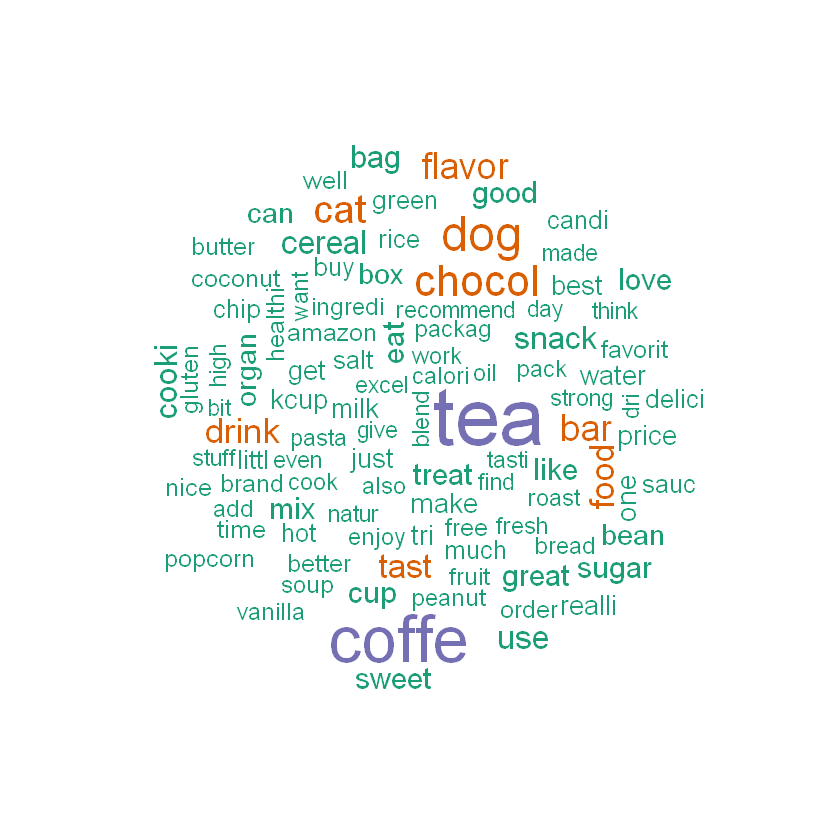

In [180]:
freq = data.frame(sort(colSums(as.matrix(dtm_ti2)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

In [181]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5175395,276.4,9424912,503.4,9424912,503.4
Vcells,190251679,1451.6,370530166,2827.0,370530166,2827.0


## Compute Cosine Similarity

In [182]:
## Compute cosine similarity
# slam package for cosine similarity computation
sim_mat_cos <- crossprod_simple_triplet_matrix(t(dtm_ti2))/(sqrt(col_sums(t(dtm_ti2)^2) %*% t(col_sums(t(dtm_ti2)^2))))

In [183]:
length(unique(review_cb_prod2$ProductId))

[1] 3619

In [184]:
dim(sim_mat_cos)[1]

[1] 3619

In [185]:
#assign colnames and rownames to the sim_mat_cos
rownames(sim_mat_cos) <- unique(review_cb_prod2$ProductId)
colnames(sim_mat_cos) <- unique(review_cb_prod2$ProductId)

In [186]:
#sim_mat_cos[1:5,1:30]

In [187]:
## Function to return a prediction matrix, cannot get output out, need some working ###
#recProd = function (simm, prod, k) {
#    recom = matrix(ncol =2, nrow = 0)
#    for (i in cust_order){
#        output = ''
#        result <- sort(simm[, i], decreasing = TRUE)[2:(k+1)]
#        output <- cbind(as.vector(names(result)), as.vector((result)))
#        recom <- rbind(recom, output)
#        }
#    #print(recom)
#    return(recom)
#    }

In [188]:
#sort(sim_mat_cos[, 'B00004RBDZ'], decreasing = TRUE)[2:(5+1)]

## Testing Content Based Model using the cust_order test data

In [189]:
k = 5 # number of product recommended
simm = sim_mat_cos 
recom = matrix(ncol =2, nrow = 0)
for (i in cust_order){
    output = ''
    result <- sort(simm[, i], decreasing = TRUE)[2:(k+1)]
    output <- cbind(as.vector(names(result)), as.vector((result)))
    recom <- rbind(recom, output)
    }

In [190]:
colnames(recom) <- c('ProductId', 'Rating')

In [191]:
cb_recom <- as.data.frame(recom[order(recom[,2], recom[,1], decreasing = TRUE),])

In [192]:
# convert Rating from factor to numeric, extra step in between, convert to char before numeric
cb_recom$Rating <- as.numeric(as.character(cb_recom$Rating))

In [193]:
head(cb_recom,10)

ProductId,Rating
<fct>,<dbl>
B001VJ0B0I,0.7300963
B002LANN56,0.7134110
B000W5U5H6,0.6331304
B0045XE32E,0.6313064
B000XZFZI4,0.6158115
B004DBS2TI,0.5105909
B007OXJK3Y,0.5090747
B005K4Q1VI,0.5007102
B007OXJL8I,0.4871892


In [194]:
# groupby and get the mean rating of each product, sort descending
cb_recom_product <- cb_recom %>%
    group_by(ProductId) %>%
    summarize(meanRating = mean(Rating)) %>%
    arrange(-meanRating) %>%
    mutate(Rank = order(meanRating, decreasing = TRUE))

In [195]:
# all relevant products
cb_recom_product

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B001VJ0B0I,0.7300963,1
B002LANN56,0.7134110,2
B000W5U5H6,0.6331304,3
B0045XE32E,0.6313064,4
B000XZFZI4,0.6158115,5
B004DBS2TI,0.5105909,6
B007OXJK3Y,0.5090747,7
B005K4Q1VI,0.5007102,8
B007OXJL8I,0.4871892,9


In [196]:
#names(result)

In [197]:
#result_i <- names(result)
#head(result_i)

In [198]:
# create tags for the product
#m1 <- as.matrix(dtm_ti2); dim(m1) # 679 rows, 6392 columns


In [199]:
# Obtain top 5 key words for each product
#tag <- t(apply(m1, 1, FUN = function(x) colnames(m1)[order(-x)[1:5]]))
#tag_unite <- unite(data.frame(tag), "tag", 1:5, sep = " ")

In [200]:
#saveRDS(sim_mat_cos, "./sim_mat_cos.rds")

In [201]:
#recProd = function (simm, prod, k) {
#    found <- sort(simm[, prod], decreasing = TRUE)[2:(k+1)]
#    print(found)
#    cat(paste0("Selected product : <title>", colnames(review_cb_prod2[prod,1])))
#    cat(paste0("Selected product: <title> ", review_cb_prod2[prod, 1]))
#    cat("\nRecommended products:\n")
#    resindex <- names(found)
#    print(resindex)
#    for (i in 1:k) {
#        cat(paste0("\n",i,"-", resindex[i], " <ProductId> ", 
#                   review_cb_prod2[resindex[i], 1], 
#                   "\n<tags> ", 
#                   tag_unite[result_i[i],]))
#    }
#}

In [202]:
review_final[review_final$ProductId == '0006641040',]

ProductId,Id,UserId,ProfileName,Score,Summary,Text,combine_summary,count
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
0006641040,150493,AMX0PJKV4PPNJ,"E. R. Bird """"Ramseelbird""""",4,Read it once. Read it twice. Reading Chicken Soup With Rice,"These days, when a person says, """"chicken soup"""" they're probably going to follow up those words with, """"for the soul"""" or maybe """"for the teenaged soul"""". Didn't used to be that way. Why I can remember a time when if a person said, """"chicken soup"""" those words were followed by an enthusiastic """"with rice!"""". Such was the power of Maurice Sendak's catchy 1962 children's book. I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun. In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no little resemblance to Sendak's other great rhyming tale """"Pierre"""" (in looks if not demeanor). It's a catchy flouncy bouncy combo of soup and the people who love it so.<br /><br />This is ostensibly a book meant to teach your children the different months of the year. Each month gets its own rhythmic poem and accompanying illustration. These are fairly simple pen and ink drawings with the occasional splash of blue (in varying shades), yellow, gray, and green. You may wonder how an author could ever hope to come up with twelve highly original soup-related poems. I mean, honestly, how much is there to say about even the fanciest soup, let alone chicken soup with rice? Quite a lot, as it happens. In the cold winter months soup is supped while sliding on ice, while celebrating the birthday of a snowman, and in a gusty gale as a whale. In the spring there's robin's nest soup, soup to cure drooping roses, and soup stolen by jealous March winds. Our hero postulates the potential joys that could come of being a cooking pot, stewing soup or (oddly enough) as """"a baubled bangled Christmas tree"""".<br /><br />Not to degrade the reading skills of parents everywhere, but I cannot recommend enough getting an audio version of this tale to accompany your child's reading. Though I am now a wise and cultured 26 year-old (the years have been kind to me in this, my old age) I can still remember the chicken soup with rice tune. Heck, I read this entire book recently and found I could do the song perfectly with each and every line. Now maybe you have your own particular chicken soup with rice song style that you're just loathe to give up. If so, fine. I understand why you might not want to taint your already existing chicken soup melody. But if you haven't found a jingle to accompany this book, get the audio version immediately, if not sooner. Until you can sing """"Whoopy once, whoopy twice, whoopy chicken soup with rice"""" with the correct oomph, you're missing out.<br /><br />I take my """"Chicken Soup With Rice"""" readings seriously. This book was the """"Chicka Chicka Boom Boom"""" of its day, and still remains the catchiest method to teach kids the months of the year. It is also seriously in danger of being forgotten. So pull out your old accordion and strap on your dancing shoes. The time for yukkin' it up to a merry dance of poultry broth is here. It's Sendak at his finest.","Read it once. Read it twice. Reading Chicken Soup With Rice These days, when a person says, """"chicken soup"""" they're probably going to follow up those words with, """"for the soul"""" or maybe """"for the teenaged soul"""". Didn't used to be that way. Why I can remember a time when if a person said, """"chicken soup"""" those words were followed by an enthusiastic """"with rice!"""". Such was the power of Maurice Sendak's catchy 1962 children's book. I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun. In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no lit

### Hybrid Recommendation

In [203]:
#### Hybrid Recommender #####

In [204]:
cust_order

[1] "B000AOOR3C" "B000VK339Y" "B0014K91GY" "B001693OLQ" "B007OSBEV0"

In [205]:
#Check for intersect of the recommendations
common <- intersect(cf_recom_product$ProductId, cb_recom_product$ProductId)

In [206]:
common

[1] "B007UL2910"

In [207]:
cf_recom_product[cf_recom_product$ProductId == common,]

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B007UL2910,7.938203,7


In [208]:
cb_recom_product[cb_recom_product$ProductId == common,]

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B007UL2910,0.3780786,15


In [209]:
#normalize cf_recom_product and cb_recom_product
cf_recom_product$meanRating = with(cf_recom_product, (meanRating - min(meanRating)) / (max(meanRating) - min(meanRating)))
cb_recom_product$meanRating = with(cb_recom_product, (meanRating - min(meanRating)) / (max(meanRating) - min(meanRating)))

In [221]:
cf_recom_product[1:5,]

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B0018VDKHU,1.0000000,1
B000SAPXGS,0.9603629,2
B005CIMZAS,0.8170986,3
B0030F3LCQ,0.7183928,4
B007TJGZ5E,0.4055436,5


In [211]:
cb_recom_product

ProductId,meanRating,Rank
<fct>,<dbl>,<int>
B001VJ0B0I,1.00000000,1
B002LANN56,0.96810787,2
B000W5U5H6,0.81465964,3
B0045XE32E,0.81117334,4
B000XZFZI4,0.78155649,5
B004DBS2TI,0.58043799,6
B007OXJK3Y,0.57753997,7
B005K4Q1VI,0.56155222,8
B007OXJL8I,0.53570819,9


In [212]:
# combine the normalized products from each recommender system
combi_prod_recom <- rbind(cf_recom_product[,1:2], cb_recom_product[,1:2])

In [213]:
# Combined normalized products recommendation, sorted descending by meanRating
combi_prod_recom <- combi_prod_recom[order(combi_prod_recom$meanRating, decreasing = TRUE),]
#combi_prod_recom

In [214]:
# total number of items
nrow(combi_prod_recom)

[1] 34

In [215]:
# recommend items from top 5, middle 3 and bottom 2 of the list to introduce a mix
combi_recom_mix <- combi_prod_recom[c(1:5, 
                                      (nrow(combi_prod_recom)/2):(nrow(combi_prod_recom)/2+2),
                                      (nrow(combi_prod_recom)-1): nrow(combi_prod_recom)),
                                   ]

In [216]:
combi_recom_mix

ProductId,meanRating
<fct>,<dbl>
B0018VDKHU,1.0000000
B001VJ0B0I,1.0000000
B002LANN56,0.9681079
B000SAPXGS,0.9603629
B005CIMZAS,0.8170986
B007TJGZ5E,0.4055436
B0030GT28C,0.3934981
B001E50X66,0.3932709
B003XB3NNE,0.0000000


In [217]:
as.vector(combi_recom_mix$ProductId)

[1] "B0018VDKHU" "B001VJ0B0I" "B002LANN56" "B000SAPXGS" "B005CIMZAS"
 [6] "B007TJGZ5E" "B0030GT28C" "B001E50X66" "B003XB3NNE" "B0016PC4TS"

In [218]:
print(paste('Buyers of', as.vector(cust_order)))

[1] "Buyers of B000AOOR3C" "Buyers of B000VK339Y" "Buyers of B0014K91GY"
[4] "Buyers of B001693OLQ" "Buyers of B007OSBEV0"


In [219]:
writeLines(paste('Buyers of', paste0(unlist(cust_order), collapse = ', '), 'may also be interested in: \n', 
      paste0(unlist(combi_recom_mix$ProductId), collapse = '\n ')) )

Buyers of B000AOOR3C, B000VK339Y, B0014K91GY, B001693OLQ, B007OSBEV0 may also be interested in: 
 B0018VDKHU
 B001VJ0B0I
 B002LANN56
 B000SAPXGS
 B005CIMZAS
 B007TJGZ5E
 B0030GT28C
 B001E50X66
 B003XB3NNE
 B0016PC4TS
